In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
## To load up drive

%cd drive/MyDrive/CSE_519_assignment/project/

[Errno 2] No such file or directory: 'drive/MyDrive/CSE_519_assignment/project/'
/content/drive/MyDrive/CSE_519_assignment/project


In [100]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

root_dir = os.getcwd()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [101]:
people_county = pd.read_csv("People.csv")
people_county = people_county.iloc[1:].reset_index()
people_county.drop("index", axis=1, inplace=True)

In [102]:
people_county = people_county.groupby("State", as_index=False).apply(lambda group: group.iloc[1:]).reset_index()
people_county.drop(["level_0", "level_1"], axis=1, inplace=True)

In [103]:
people_county["County_state"] = people_county["County"] + people_county["State"]

In [104]:
temp = people_county.groupby("County_state").count()
delete_keys = temp[temp["FIPS"] > 1].index
delete_keys

Index(['BaltimoreMD', 'FairfaxVA', 'FranklinVA', 'RichmondVA', 'RoanokeVA',
       'St. LouisMO'],
      dtype='object', name='County_state')

In [105]:
people_county = people_county[~people_county["County_state"].isin(delete_keys)]

In [106]:
people_county.head()

,FIPS,State,County,PopChangeRate1819,PopChangeRate1019,TotalPopEst2019,NetMigrationRate1019,NaturalChangeRate1019,Net_International_Migration_Rate_2010_2019,PopChangeRate0010,NetMigrationRate0010,NaturalChangeRate0010,Immigration_Rate_2000_2010,PopDensity2010,Under18Pct2010,Age65AndOlderPct2010,WhiteNonHispanicPct2010,BlackNonHispanicPct2010,AsianNonHispanicPct2010,NativeAmericanNonHispanicPct2010,HispanicPct2010,MultipleRacePct2010,NonHispanicWhitePopChangeRate0010,NonHispanicBlackPopChangeRate0010,NonHispanicAsianPopChangeRate0010,NonHispanicNativeAmericanPopChangeRate0010,HispanicPopChangeRate0010,MultipleRacePopChangeRate0010,WhiteNonHispanicNum2010,BlackNonHispanicNum2010,AsianNonHispanicNum2010,NativeAmericanNonHispanicNum2010,HispanicNum2010,MultipleRaceNum2010,ForeignBornPct,ForeignBornEuropePct,ForeignBornMexPct,NonEnglishHHPct,Ed1LessThanHSPct,Ed2HSDiplomaOnlyPct,Ed3SomeCollegePct,Ed4AssocDegreePct,Ed5CollegePlusPct,AvgHHSize,FemaleHHPct,HH65PlusAlonePct,OwnHomePct,ForeignBornNum,TotalPopACS,ForeignBornAfricaPct,Ed3SomeCollegeNum,Ed2HSDiplomaOnlyNum,Ed1LessThanHSNum,TotalPop25Plus,Ed5CollegePlusNum,TotalOccHU,ForeignBornAsiaPct,Ed4AssocDegreeNum,ForeignBornEuropeNum,NonEnglishHHNum,HH65PlusAloneNum,OwnHomeNum,FemaleHHNum,TotalHH,ForeignBornCentralSouthAmPct,ForeignBornCentralSouthAmNum,ForeignBornCaribPct,ForeignBornCaribNum,ForeignBornAfricaNum,ForeignBornAsiaNum,ForeignBornMexNum,LandAreaSQMiles2010,Age65AndOlderNum2010,TotalPop2010,Under18Num2010,Net_International_Migration_2000_2010,NaturalChangeNum0010,NetMigrationNum0010,TotalPopEst2012,TotalPopEst2013,TotalPopEst2010,TotalPopEst2014,TotalPopEst2011,Net_International_Migration_2010_2019,NaturalChange1019,TotalPopEst2015,TotalPopEst2016,TotalPopEst2017,NetMigration1019,TotalPopEst2018,TotalPopEstBase2010,County_state
0,2013,AK,Aleutians East,-1.708,5.401,3337,3.411,1.990,21.257,16.46,-1.32,5.03,1.893799,0.45,11.81,4.93,13.53,6.75,35.43,27.67,12.26,4.87,-18.43,404.76,56.32,-13.01,13.57,93.67,425,212,1113,869,385,153,27.090103,1.624815,3.220089,2.696629,14.525994,43.463303,25.114679,5.389908,11.506116,2.61,12.247191,7.752809,63.820225,917.0,3385,2.511078,657,1137,380,2616,301,890,16.868538,141,55.0,24,69,568,109,890,3.485968,118.0,2.274742,77.0,85.0,571.0,109.0,6981.94,155,3141,371,51.0,135.5,-35.5,3294,3343,3166,3346,3259,673.0,63.0,3373,3363,3455,108.0,3395,3141,Aleutians EastAK
1,2016,AK,Aleutians West,-0.106,1.349,5634,-2.033,3.382,15.470,1.76,-18.66,4.65,4.661792,1.27,14.66,3.47,31.38,5.72,28.32,15.12,13.06,5.59,-15.25,92.73,17.71,-25.97,26.70,64.55,1745,318,1575,841,726,311,41.646192,0.596701,2.983503,6.739680,10.540344,39.035619,26.266053,7.123819,17.034165,3.74,9.014322,6.149958,28.222409,2373.0,5698,1.193401,1084,1611,435,4127,703,1187,34.011934,294,34.0,80,73,335,107,1187,4.018954,229.0,0.438750,25.0,68.0,1938.0,170.0,4390.28,193,5561,815,255.0,254.5,-1020.5,5676,5777,5559,5822,5582,860.0,188.0,5781,5705,5729,-113.0,5640,5561,Aleutians WestAK
2,2020,AK,Anchorage,-0.868,-1.814,288000,-10.444,8.629,2.820,12.12,0.02,11.99,2.028633,171.19,25.97,7.24,62.64,5.25,7.95,7.55,7.56,8.10,0.46,4.37,63.34,20.30,49.07,51.81,182814,15308,23208,22047,22061,23645,10.902767,1.111637,0.922219,2.829206,6.098400,23.420024,25.398968,8.973784,36.108824,2.69,11.336530,7.097882,61.338876,32003.0,293531,0.617311,48733,44936,11701,191870,69282,106567,6.176860,17218,3263.0,3015,7564,65367,12081,106567,1.560312,4580.0,0.526350,1545.0,1812.0,18131.0,2707.0,1704.68,21139,291826,75786,5291.0,31274.0,40.0,298255,301142,293321,299893,296197,8273.0,25312.0,297547,297249,294338,-30633.0,290521,291836,AnchorageAK
3,2050,AK,Bethel,0.917,7.621,18386,-8.581,16.202,0.310,6.29,-11.09,20.97,0.211443,0.42,36.55,6.12,10.90,0.38,0.93,82.62,1.06,4.19,-5.31,10.17,-5.95,7.60,29.29,15.56,1854,65,158,14056,181,713,2.288519,0.490791,0.027573,6.371129,19.089889,46.423834,17.998163,4.611774,11.876339,3.83,19.670305,3.452885,58.164402,415.0,18134,0.115805,1764,4550,1871,9801,1164,4489,0.931951,452,89.0,286,15

In [107]:
income_county = pd.read_csv("Income.csv")
income_county = income_county.iloc[1:].reset_index()
income_county.drop("index", axis=1, inplace=True)

In [108]:
income_county = income_county.groupby("State", as_index=False).apply(lambda group: group.iloc[1:]).reset_index()
income_county.drop(["level_0", "level_1"], axis=1, inplace=True)

In [109]:
income_county["County_state"] = income_county["County"] + income_county["State"]

In [110]:
temp = income_county.groupby("County_state").count()
delete_keys = temp[temp["FIPS"] > 1].index
delete_keys

Index(['BaltimoreMD', 'BedfordVA', 'FairfaxVA', 'FranklinVA', 'RichmondVA',
       'RoanokeVA', 'St. LouisMO'],
      dtype='object', name='County_state')

In [111]:
income_county = income_county[~income_county["County_state"].isin(delete_keys)]

In [112]:
income_county.head()

,FIPS,State,County,Median_HH_Inc_ACS,PerCapitaInc,Poverty_Rate_0_17_ACS,Poverty_Rate_ACS,Deep_Pov_All,Deep_Pov_Children,NumAll_inPOV_ACS,PCTPOV017,POV017,MedHHInc,POVALL,PCTPOVALL,Num_inPOV_0_17_ACS,County_state
0,2010,AK,Aleutian Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aleutian IslandsAK
1,2013,AK,Aleutians East,69250.0,33939.0,20.746888,13.765542,4.470101,7.053942,465.0,13.4,33.0,66923.0,492.0,14.8,100.0,Aleutians EastAK
2,2016,AK,Aleutians West,87466.0,39647.0,6.588735,6.839017,2.200220,3.613177,373.0,5.4,34.0,84726.0,414.0,7.6,62.0,Aleutians WestAK
3,2020,AK,Anchorage,84928.0,41415.0,13.083409,9.026401,3.933627,4.628946,25861.0,11.0,7383.0,82512.0,26636.0,9.5,9217.0,AnchorageAK
4,2050,AK,Bethel,53553.0,19885.0,34.245683,28.260129,11.758030,14.173998,4980.0,31.6,2013.0,48262.0,4249.0,23.5,2102.0,BethelAK


In [113]:
people_county_all_county = set(people_county["County_state"].unique())
income_county_all_county = set(income_county["County_state"].unique())

In [114]:
print(len(people_county_all_county), len(income_county_all_county))


3207 3211


In [115]:
covid_vaccination_data_county = pd.read_csv("COVID-19_Vaccinations_in_the_United_States_County.csv", error_bad_lines=False)

b'Skipping line 7150: expected 32 fields, saw 37\nSkipping line 14440: expected 32 fields, saw 38\n'
b'Skipping line 36054: expected 32 fields, saw 42\n'
b'Skipping line 50522: expected 32 fields, saw 53\n'
b'Skipping line 79461: expected 32 fields, saw 37\n'
b'Skipping line 93942: expected 32 fields, saw 51\n'
b'Skipping line 115772: expected 32 fields, saw 39\nSkipping line 130273: expected 32 fields, saw 61\n'
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,14,15,16,19,20,21,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [116]:
covid_vaccination_data_county["Recip_County"] = covid_vaccination_data_county["Recip_County"].str.rstrip('County').str.strip()
covid_vaccination_data_county["Recip_State"] = covid_vaccination_data_county["Recip_State"].str.strip()
covid_vaccination_data_county["County_state"] = covid_vaccination_data_county["Recip_County"] + covid_vaccination_data_county["Recip_State"]
covid_vaccination_data_county.sort_values("Date", inplace=True)
covid_vaccination_data_county = covid_vaccination_data_county[covid_vaccination_data_county["FIPS"]!="UNK"]
covid_vaccination_data_county['FIPS'] = pd.to_numeric(covid_vaccination_data_county['FIPS'])

In [117]:
original_covid_vaccination_data_county = covid_vaccination_data_county.copy()
covid_vaccination_data_county.head()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity,County_state
757105,03/27/2021,6021,12,Glenn,CA,14.5,4108.0,4108.0,17.5,4105.0,19.7,2240.0,50.0,96.8,6386,22.5,6386,27.3,6371.0,30.6,3082,68.9,D,13.0,13,13,15.0,Non-metro,5.0,5.0,5.0,7.0,GlennCA
148563,03/27/2021,28099,12,Neshoba,MS,11.6,3385.0,3385.0,14.1,3374.0,16.0,1846.0,39.4,99.2,5182,17.8,5182,21.6,5158.0,24.5,2351,50.2,D,13.0,13,13,14.0,Non-metro,5.0,5.0,5.0,6.0,NeshobaMS
148564,03/27/2021,48061,12,Cameron,TX,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,D,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN,CameronTX
148565,03/27/2021,55031,12,Douglas,WI,10.9,4686.0,4686.0,12.5,4676.0,13.5,2571.0,31.0,97.8,10192,23.6,10192,27.1,10168.0,29.3,4723,57,B,5.0,5,5,6.0,Metro,1.0,1.0,1.0,2.0,DouglasWI
148566,03/27/2021,48109,12,Culberson,TX,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,D,NaN,NaN,NaN,NaN,Non-metro,NaN,NaN,NaN,NaN,CulbersonTX


In [118]:
covid_vaccination_data_county = covid_vaccination_data_county[covid_vaccination_data_county["Date"] == "10/19/2021"]
vaccination_county = list(covid_vaccination_data_county["County_state"].unique())
common_county = list(people_county_all_county.intersection(vaccination_county))
len(common_county)

3001

In [119]:
income_county = income_county.loc[income_county['County_state'].isin(common_county)]
people_county = people_county.loc[people_county['County_state'].isin(common_county)]
covid_vaccination_data_county = covid_vaccination_data_county.loc[covid_vaccination_data_county['County_state'].isin(common_county)]
original_covid_vaccination_data_county = original_covid_vaccination_data_county.loc[original_covid_vaccination_data_county['County_state'].isin(common_county)]

In [120]:
merge_vaccination_data_temp = pd.merge(income_county, covid_vaccination_data_county, on="County_state", how='outer')
merge_vaccination_data = pd.merge(people_county, merge_vaccination_data_temp, on="County_state", how='outer')

In [121]:
merge_all_dates_vaccination_data_temp = pd.merge(income_county, original_covid_vaccination_data_county, on="County_state", how='outer')
merge_all_dates_vaccination_data = pd.merge(people_county, merge_all_dates_vaccination_data_temp, on="County_state", how='outer')

In [122]:
merge_vaccination_data.head()

,FIPS,State_x,County_x,PopChangeRate1819,PopChangeRate1019,TotalPopEst2019,NetMigrationRate1019,NaturalChangeRate1019,Net_International_Migration_Rate_2010_2019,PopChangeRate0010,NetMigrationRate0010,NaturalChangeRate0010,Immigration_Rate_2000_2010,PopDensity2010,Under18Pct2010,Age65AndOlderPct2010,WhiteNonHispanicPct2010,BlackNonHispanicPct2010,AsianNonHispanicPct2010,NativeAmericanNonHispanicPct2010,HispanicPct2010,MultipleRacePct2010,NonHispanicWhitePopChangeRate0010,NonHispanicBlackPopChangeRate0010,NonHispanicAsianPopChangeRate0010,NonHispanicNativeAmericanPopChangeRate0010,HispanicPopChangeRate0010,MultipleRacePopChangeRate0010,WhiteNonHispanicNum2010,BlackNonHispanicNum2010,AsianNonHispanicNum2010,NativeAmericanNonHispanicNum2010,HispanicNum2010,MultipleRaceNum2010,ForeignBornPct,ForeignBornEuropePct,ForeignBornMexPct,NonEnglishHHPct,Ed1LessThanHSPct,Ed2HSDiplomaOnlyPct,Ed3SomeCollegePct,Ed4AssocDegreePct,Ed5CollegePlusPct,AvgHHSize,FemaleHHPct,HH65PlusAlonePct,OwnHomePct,ForeignBornNum,TotalPopACS,ForeignBornAfricaPct,Ed3SomeCollegeNum,Ed2HSDiplomaOnlyNum,Ed1LessThanHSNum,TotalPop25Plus,Ed5CollegePlusNum,TotalOccHU,ForeignBornAsiaPct,Ed4AssocDegreeNum,ForeignBornEuropeNum,NonEnglishHHNum,HH65PlusAloneNum,OwnHomeNum,FemaleHHNum,TotalHH,ForeignBornCentralSouthAmPct,ForeignBornCentralSouthAmNum,ForeignBornCaribPct,ForeignBornCaribNum,ForeignBornAfricaNum,ForeignBornAsiaNum,ForeignBornMexNum,LandAreaSQMiles2010,Age65AndOlderNum2010,TotalPop2010,Under18Num2010,Net_International_Migration_2000_2010,NaturalChangeNum0010,NetMigrationNum0010,TotalPopEst2012,TotalPopEst2013,TotalPopEst2010,TotalPopEst2014,TotalPopEst2011,Net_International_Migration_2010_2019,NaturalChange1019,TotalPopEst2015,TotalPopEst2016,TotalPopEst2017,NetMigration1019,TotalPopEst2018,TotalPopEstBase2010,County_state,FIPS_x,State_y,County_y,Median_HH_Inc_ACS,PerCapitaInc,Poverty_Rate_0_17_ACS,Poverty_Rate_ACS,Deep_Pov_All,Deep_Pov_Children,NumAll_inPOV_ACS,PCTPOV017,POV017,MedHHInc,POVALL,PCTPOVALL,Num_inPOV_0_17_ACS,Date,FIPS_y,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,1001,AL,Autauga,0.605,2.001,55869,0.686,1.315,-0.029,24.96,11.87,5.46,-0.010222,91.80,26.78,12.00,77.25,17.58,0.86,0.40,2.40,1.59,21.05,29.17,140.72,16.67,114.75,114.57,42154,9595,467,217,1310,869,2.345612,0.346696,0.474901,0.715054,11.483394,33.588460,19.950759,8.405813,26.571574,2.56,13.001823,10.370613,73.290648,1299.0,55380,0.236547,7455,12551,4291,37367,9929,21397,0.895630,3141,192.0,153,2219,15682,2782,21397,0.707837,392.0,0.130011,72.0,131.0,496.0,263.0,594.44,6546,54571,14613,-4.5,2403.5,5224.0,54954,54727,54773,54893,55227,-16.0,720.0,54864,55243,55390,376.0,55533,54597,AutaugaAL,1001.0,AL,Autauga,58731.0,29819.0,23.215238,15.185172,6.261607,9.592381,8340.0,15.9,2040.0,58233.0,6723.0,12.1,3047.0,10/19/2021,1001,42,Autauga,AL,35.0,19562.0,19561.0,41.1,18397.0,42.9,5572.0,62.4,92.5,24428,43.7,24426,51.3,22908.0,53.4,6704,75.1,B,6.0,7,7,7.0,Metro,2.0,3.0,3.0,3.0
1,1003,AL,Baldwin,2.469,21.911,223234,21.001,0.910,0.714,29.80,26.17,3.32,1.584455,114.65,22.99,16.77,83.50,9.31,0.74,0.63,4.38,1.49,25.92,18.17,152.35,52.19,224.09,85.74,152200,16966,1340,1146,7992,2723,3.723159,0.817554,0.829770,1.186210,9.193843,27.659617

In [123]:
merge_vaccination_data.dtypes

FIPS                                            int64
State_x                                        object
County_x                                       object
PopChangeRate1819                             float64
PopChangeRate1019                             float64
TotalPopEst2019                                 int64
NetMigrationRate1019                          float64
NaturalChangeRate1019                         float64
Net_International_Migration_Rate_2010_2019    float64
PopChangeRate0010                             float64
NetMigrationRate0010                          float64
NaturalChangeRate0010                         float64
Immigration_Rate_2000_2010                    float64
PopDensity2010                                float64
Under18Pct2010                                float64
Age65AndOlderPct2010                          float64
WhiteNonHispanicPct2010                       float64
BlackNonHispanicPct2010                       float64
AsianNonHispanicPct2010     

In [124]:
merge_vaccination_data["TotalPopACS"].median()

25773.0

In [125]:
merge_vaccination_data = merge_vaccination_data[merge_vaccination_data["TotalPopACS"] > merge_vaccination_data["TotalPopACS"].median()]

In [126]:
county_level_vaccines_all_complete = merge_vaccination_data.sort_values(['Series_Complete_Pop_Pct'], ascending=False)
county_level_vaccines_administered_dose1 = merge_vaccination_data.sort_values(['Administered_Dose1_Pop_Pct'], ascending=False)

In [127]:
county_level_vaccines_all_complete.head()

,FIPS,State_x,County_x,PopChangeRate1819,PopChangeRate1019,TotalPopEst2019,NetMigrationRate1019,NaturalChangeRate1019,Net_International_Migration_Rate_2010_2019,PopChangeRate0010,NetMigrationRate0010,NaturalChangeRate0010,Immigration_Rate_2000_2010,PopDensity2010,Under18Pct2010,Age65AndOlderPct2010,WhiteNonHispanicPct2010,BlackNonHispanicPct2010,AsianNonHispanicPct2010,NativeAmericanNonHispanicPct2010,HispanicPct2010,MultipleRacePct2010,NonHispanicWhitePopChangeRate0010,NonHispanicBlackPopChangeRate0010,NonHispanicAsianPopChangeRate0010,NonHispanicNativeAmericanPopChangeRate0010,HispanicPopChangeRate0010,MultipleRacePopChangeRate0010,WhiteNonHispanicNum2010,BlackNonHispanicNum2010,AsianNonHispanicNum2010,NativeAmericanNonHispanicNum2010,HispanicNum2010,MultipleRaceNum2010,ForeignBornPct,ForeignBornEuropePct,ForeignBornMexPct,NonEnglishHHPct,Ed1LessThanHSPct,Ed2HSDiplomaOnlyPct,Ed3SomeCollegePct,Ed4AssocDegreePct,Ed5CollegePlusPct,AvgHHSize,FemaleHHPct,HH65PlusAlonePct,OwnHomePct,ForeignBornNum,TotalPopACS,ForeignBornAfricaPct,Ed3SomeCollegeNum,Ed2HSDiplomaOnlyNum,Ed1LessThanHSNum,TotalPop25Plus,Ed5CollegePlusNum,TotalOccHU,ForeignBornAsiaPct,Ed4AssocDegreeNum,ForeignBornEuropeNum,NonEnglishHHNum,HH65PlusAloneNum,OwnHomeNum,FemaleHHNum,TotalHH,ForeignBornCentralSouthAmPct,ForeignBornCentralSouthAmNum,ForeignBornCaribPct,ForeignBornCaribNum,ForeignBornAfricaNum,ForeignBornAsiaNum,ForeignBornMexNum,LandAreaSQMiles2010,Age65AndOlderNum2010,TotalPop2010,Under18Num2010,Net_International_Migration_2000_2010,NaturalChangeNum0010,NetMigrationNum0010,TotalPopEst2012,TotalPopEst2013,TotalPopEst2010,TotalPopEst2014,TotalPopEst2011,Net_International_Migration_2010_2019,NaturalChange1019,TotalPopEst2015,TotalPopEst2016,TotalPopEst2017,NetMigration1019,TotalPopEst2018,TotalPopEstBase2010,County_state,FIPS_x,State_y,County_y,Median_HH_Inc_ACS,PerCapitaInc,Poverty_Rate_0_17_ACS,Poverty_Rate_ACS,Deep_Pov_All,Deep_Pov_Children,NumAll_inPOV_ACS,PCTPOV017,POV017,MedHHInc,POVALL,PCTPOVALL,Num_inPOV_0_17_ACS,Date,FIPS_y,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
1850,35031,NM,McKinley,-0.756,-0.427,71367,-6.379,5.952,0.681,-4.42,-16.16,12.05,0.797983,13.12,31.29,9.53,10.33,0.44,0.76,73.30,13.25,3.07,-17.05,10.45,65.75,-4.27,2.12,16.74,7384,317,542,52402,9473,2197,2.219829,0.042795,1.156851,7.687900,22.753800,34.376131,23.918748,7.519001,11.432320,3.42,26.511317,9.249355,70.919683,1608.0,72438,0.127005,10574,15197,10059,44208,5054,20942,0.851763,3324,31.0,1610,1937,14852,5552,20942,1.162373,842.0,0.016566,12.0,92.0,617.0,838.0,5449.81,6813,71492,22373,595.0,8983.5,-12052.5,72365,72665,71673,72796,72332,488.0,4266.0,73462,73028,72423,-4572.0,71911,71485,McKinleyNM,35031.0,NM,McKinley,33834.0,15931.0,43.948211,34.824428,17.452640,25.026671,24982.0,39.0,7711.0,36404.0,21294.0,30.1,9063.0,10/19/2021,35031,42,McKinley,NM,99.9,71907.0,71892.0,99.9,60970.0,99.9,11871.0,99.9,84.4,79567,99.9,79518,99.9,67447.0,99.9,13121,99.9,D,16.0,16,16,16.0,Non-metro,8.0,8.0,8.0,8.0
154,4023,AZ,Santa Cruz,0.222,-1.934,46498,-8.630,6.696,1.694,23.55,1.52,13.80,6.135168,38.34,30.70,13.13,15.95,0.19,0.50,0.24,82.82,2.01,10.67,18.67,24.34,21.05,26.67,-5.55,7564,89,235,115,39273,953,33.138985,0.402324,31.58562

In [128]:
top_25_vaccinated_counties_all_complete = county_level_vaccines_all_complete[:25]
top_25_vaccinated_counties_dose1_complete = county_level_vaccines_administered_dose1[:25]

In [129]:
top_25_vaccinated_counties_all_complete[["County_state", "Series_Complete_Pop_Pct", "TotalPopACS", "Administered_Dose1_Pop_Pct"]].head()

,County_state,Series_Complete_Pop_Pct,TotalPopACS,Administered_Dose1_Pop_Pct
1850,McKinleyNM,99.9,72438,99.9
154,Santa CruzAZ,90.0,46480,99.2
177,MarinCA,77.6,259943,85.5
1122,CumberlandME,77.0,292307,81.6
1111,MontgomeryMD,76.7,1043530,84.9


In [130]:
top_25_vaccinated_counties_dose1_complete.head()

,FIPS,State_x,County_x,PopChangeRate1819,PopChangeRate1019,TotalPopEst2019,NetMigrationRate1019,NaturalChangeRate1019,Net_International_Migration_Rate_2010_2019,PopChangeRate0010,NetMigrationRate0010,NaturalChangeRate0010,Immigration_Rate_2000_2010,PopDensity2010,Under18Pct2010,Age65AndOlderPct2010,WhiteNonHispanicPct2010,BlackNonHispanicPct2010,AsianNonHispanicPct2010,NativeAmericanNonHispanicPct2010,HispanicPct2010,MultipleRacePct2010,NonHispanicWhitePopChangeRate0010,NonHispanicBlackPopChangeRate0010,NonHispanicAsianPopChangeRate0010,NonHispanicNativeAmericanPopChangeRate0010,HispanicPopChangeRate0010,MultipleRacePopChangeRate0010,WhiteNonHispanicNum2010,BlackNonHispanicNum2010,AsianNonHispanicNum2010,NativeAmericanNonHispanicNum2010,HispanicNum2010,MultipleRaceNum2010,ForeignBornPct,ForeignBornEuropePct,ForeignBornMexPct,NonEnglishHHPct,Ed1LessThanHSPct,Ed2HSDiplomaOnlyPct,Ed3SomeCollegePct,Ed4AssocDegreePct,Ed5CollegePlusPct,AvgHHSize,FemaleHHPct,HH65PlusAlonePct,OwnHomePct,ForeignBornNum,TotalPopACS,ForeignBornAfricaPct,Ed3SomeCollegeNum,Ed2HSDiplomaOnlyNum,Ed1LessThanHSNum,TotalPop25Plus,Ed5CollegePlusNum,TotalOccHU,ForeignBornAsiaPct,Ed4AssocDegreeNum,ForeignBornEuropeNum,NonEnglishHHNum,HH65PlusAloneNum,OwnHomeNum,FemaleHHNum,TotalHH,ForeignBornCentralSouthAmPct,ForeignBornCentralSouthAmNum,ForeignBornCaribPct,ForeignBornCaribNum,ForeignBornAfricaNum,ForeignBornAsiaNum,ForeignBornMexNum,LandAreaSQMiles2010,Age65AndOlderNum2010,TotalPop2010,Under18Num2010,Net_International_Migration_2000_2010,NaturalChangeNum0010,NetMigrationNum0010,TotalPopEst2012,TotalPopEst2013,TotalPopEst2010,TotalPopEst2014,TotalPopEst2011,Net_International_Migration_2010_2019,NaturalChange1019,TotalPopEst2015,TotalPopEst2016,TotalPopEst2017,NetMigration1019,TotalPopEst2018,TotalPopEstBase2010,County_state,FIPS_x,State_y,County_y,Median_HH_Inc_ACS,PerCapitaInc,Poverty_Rate_0_17_ACS,Poverty_Rate_ACS,Deep_Pov_All,Deep_Pov_Children,NumAll_inPOV_ACS,PCTPOV017,POV017,MedHHInc,POVALL,PCTPOVALL,Num_inPOV_0_17_ACS,Date,FIPS_y,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
193,6073,CA,San Diego,0.134,7.577,3338330,1.167,6.409,3.374,10.00,-0.63,9.26,3.862818,735.82,23.40,11.35,48.46,4.74,10.60,0.46,32.03,5.12,-3.15,-5.11,33.74,-7.57,32.01,20.05,1500047,146600,328058,14098,991348,158425,23.366765,1.834670,10.132738,6.312884,12.553843,18.232809,22.316811,8.091531,38.805006,2.87,11.671611,9.022417,53.329020,774859.0,3316073,0.568021,501363,409613,282031,2246571,871782,1125286,9.016840,181782,60839.0,71038,101528,600104,131339,1125286,11.278461,374002.0,0.176534,5854.0,18836.0,299005.0,336009.0,4206.63,351425,3095313,724168,109216.0,261872.5,-17898.5,3174335,3209768,3103212,3248877,3137156,104716.0,198895.0,3280850,3306089,3321237,36223.0,3333861,3095349,San DiegoCA,6073.0,CA,San Diego,78980.0,38073.0,14.666828,11.587868,5.438324,6.184913,374787.0,12.8,89798.0,83576.0,335034.0,10.3,104545.0,10/19/2021,6073,42,San Diego,CA,51.1,1706852.0,1703224.0,59.6,1571939.0,59.9,310055.0,64.0,97.4,3.40558e+06,99.9,3.39759e+06,99.9,3174621.0,99.9,778794,99.9,C,12.0,12,12,11.0,Metro,4.0,4.0,4.0,3.0
1850,35031,NM,McKinley,-0.756,-0.427,71367,-6.379,5.952,0.681,-4.42,-16.16,12.05,0.797983,13.12,31.29,9.53,10.33,0.

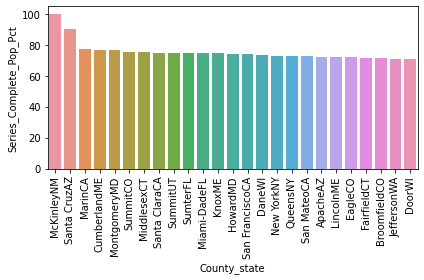

In [131]:
ax = sns.barplot(data=top_25_vaccinated_counties_all_complete, x="County_state", y="Series_Complete_Pop_Pct")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.savefig('top_25_vaccinated_counties_all_complete.png', bbox_inches='tight')

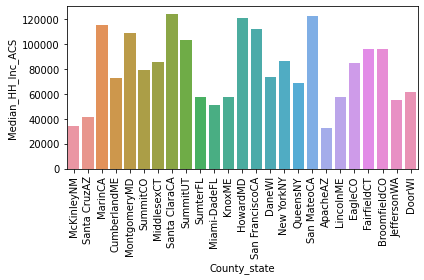

In [132]:
ax = sns.barplot(data=top_25_vaccinated_counties_all_complete, x="County_state", y="Median_HH_Inc_ACS")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.savefig('top_25_vaccinated_counties_all_complete_median.png', bbox_inches='tight')

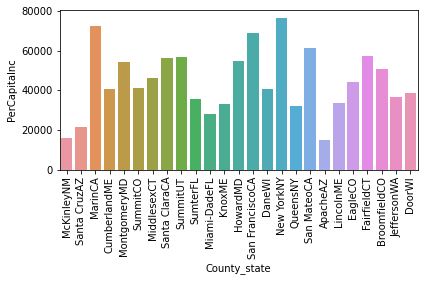

In [133]:
ax = sns.barplot(data=top_25_vaccinated_counties_all_complete, x="County_state", y="PerCapitaInc")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.savefig('top_25_vaccinated_counties_all_complete_per_capitaInc.png', bbox_inches='tight')

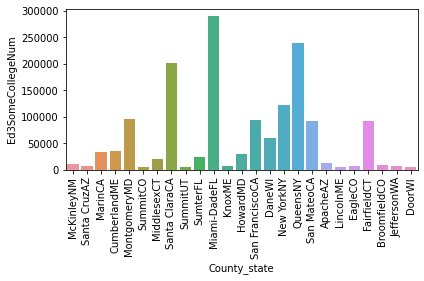

In [134]:
ax = sns.barplot(data=top_25_vaccinated_counties_all_complete, x="County_state", y="Ed3SomeCollegeNum")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.savefig('population_analysis_ed3_college.png', bbox_inches='tight')

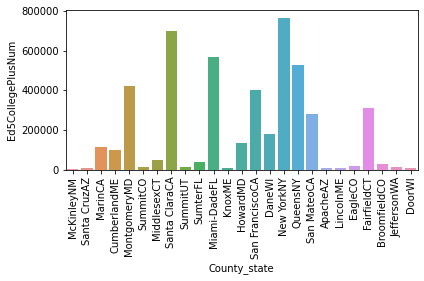

In [135]:
ax = sns.barplot(data=top_25_vaccinated_counties_all_complete, x="County_state", y="Ed5CollegePlusNum")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.savefig('population_analysis_ed5_college.png', bbox_inches='tight')

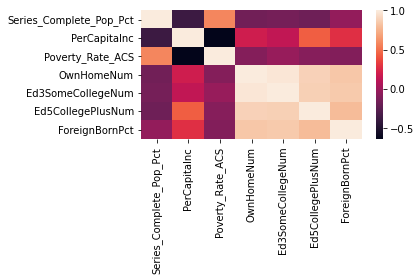

In [136]:
top_25_vaccinated_counties_all_complete_corr = top_25_vaccinated_counties_all_complete[["Series_Complete_Pop_Pct", "PerCapitaInc", "Poverty_Rate_ACS", "OwnHomeNum", "Ed3SomeCollegeNum", "Ed5CollegePlusNum", "ForeignBornPct"]]
pear_corr = top_25_vaccinated_counties_all_complete_corr.corr(method='pearson')
ax = sns.heatmap(pear_corr)
plt.tight_layout()
plt.savefig('pearson_correlation.png')

In [137]:
merge_all_dates_vaccination_data.head()

,FIPS,State_x,County_x,PopChangeRate1819,PopChangeRate1019,TotalPopEst2019,NetMigrationRate1019,NaturalChangeRate1019,Net_International_Migration_Rate_2010_2019,PopChangeRate0010,NetMigrationRate0010,NaturalChangeRate0010,Immigration_Rate_2000_2010,PopDensity2010,Under18Pct2010,Age65AndOlderPct2010,WhiteNonHispanicPct2010,BlackNonHispanicPct2010,AsianNonHispanicPct2010,NativeAmericanNonHispanicPct2010,HispanicPct2010,MultipleRacePct2010,NonHispanicWhitePopChangeRate0010,NonHispanicBlackPopChangeRate0010,NonHispanicAsianPopChangeRate0010,NonHispanicNativeAmericanPopChangeRate0010,HispanicPopChangeRate0010,MultipleRacePopChangeRate0010,WhiteNonHispanicNum2010,BlackNonHispanicNum2010,AsianNonHispanicNum2010,NativeAmericanNonHispanicNum2010,HispanicNum2010,MultipleRaceNum2010,ForeignBornPct,ForeignBornEuropePct,ForeignBornMexPct,NonEnglishHHPct,Ed1LessThanHSPct,Ed2HSDiplomaOnlyPct,Ed3SomeCollegePct,Ed4AssocDegreePct,Ed5CollegePlusPct,AvgHHSize,FemaleHHPct,HH65PlusAlonePct,OwnHomePct,ForeignBornNum,TotalPopACS,ForeignBornAfricaPct,Ed3SomeCollegeNum,Ed2HSDiplomaOnlyNum,Ed1LessThanHSNum,TotalPop25Plus,Ed5CollegePlusNum,TotalOccHU,ForeignBornAsiaPct,Ed4AssocDegreeNum,ForeignBornEuropeNum,NonEnglishHHNum,HH65PlusAloneNum,OwnHomeNum,FemaleHHNum,TotalHH,ForeignBornCentralSouthAmPct,ForeignBornCentralSouthAmNum,ForeignBornCaribPct,ForeignBornCaribNum,ForeignBornAfricaNum,ForeignBornAsiaNum,ForeignBornMexNum,LandAreaSQMiles2010,Age65AndOlderNum2010,TotalPop2010,Under18Num2010,Net_International_Migration_2000_2010,NaturalChangeNum0010,NetMigrationNum0010,TotalPopEst2012,TotalPopEst2013,TotalPopEst2010,TotalPopEst2014,TotalPopEst2011,Net_International_Migration_2010_2019,NaturalChange1019,TotalPopEst2015,TotalPopEst2016,TotalPopEst2017,NetMigration1019,TotalPopEst2018,TotalPopEstBase2010,County_state,FIPS_x,State_y,County_y,Median_HH_Inc_ACS,PerCapitaInc,Poverty_Rate_0_17_ACS,Poverty_Rate_ACS,Deep_Pov_All,Deep_Pov_Children,NumAll_inPOV_ACS,PCTPOV017,POV017,MedHHInc,POVALL,PCTPOVALL,Num_inPOV_0_17_ACS,Date,FIPS_y,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,1001,AL,Autauga,0.605,2.001,55869,0.686,1.315,-0.029,24.96,11.87,5.46,-0.010222,91.8,26.78,12.0,77.25,17.58,0.86,0.4,2.4,1.59,21.05,29.17,140.72,16.67,114.75,114.57,42154,9595,467,217,1310,869,2.345612,0.346696,0.474901,0.715054,11.483394,33.58846,19.950759,8.405813,26.571574,2.56,13.001823,10.370613,73.290648,1299.0,55380,0.236547,7455,12551,4291,37367,9929,21397,0.89563,3141,192.0,153,2219,15682,2782,21397,0.707837,392.0,0.130011,72.0,131.0,496.0,263.0,594.44,6546,54571,14613,-4.5,2403.5,5224.0,54954,54727,54773,54893,55227,-16.0,720.0,54864,55243,55390,376.0,55533,54597,AutaugaAL,1001.0,AL,Autauga,58731.0,29819.0,23.215238,15.185172,6.261607,9.592381,8340.0,15.9,2040.0,58233.0,6723.0,12.1,3047.0,03/27/2021,1001,12,Autauga,AL,8.1,4532.0,4532.0,9.5,4531.0,10.6,2406.0,27.0,93.5,8105,14.5,8105,17.0,8093.0,18.9,3934,44.1,B,5.0,5,5,5.0,Metro,1.0,1.0,1.0,1.0
1,1001,AL,Autauga,0.605,2.001,55869,0.686,1.315,-0.029,24.96,11.87,5.46,-0.010222,91.8,26.78,12.0,77.25,17.58,0.86,0.4,2.4,1.59,21.05,29.17,140.72,16.67,114.75,114.57,42154,9595,467,217,1310,869,2.345612,0.346696,0.474901,0.715054,11.483394,33.58846,19.950759,8.405813,26.

In [138]:
merge_all_dates_vaccination_data["Poverty_Rate_ACS"].max()

55.45183714

In [139]:
# merge_all_dates_vaccination_data.to_csv(root_dir+"/merge_all_dates_vaccination_data.csv",chunksize=1000, index=False)

In [140]:
poverty_data_bins = []
num_bins = 6

def create_bins(data, bins, poverty_data_bins):
  for i in range(bins):
    temp_bin = []
    temp_bin = data[(data['Poverty_Rate_ACS'] >= i * 10.0) & (data['Poverty_Rate_ACS'] < i * 10.0 + 10.0)][["Date", "Series_Complete_Pop_Pct", "Poverty_Rate_ACS"]]
    poverty_data_bins.append(temp_bin)
  return poverty_data_bins


df_pov = create_bins(merge_all_dates_vaccination_data, num_bins, poverty_data_bins)
# df_pov[0]

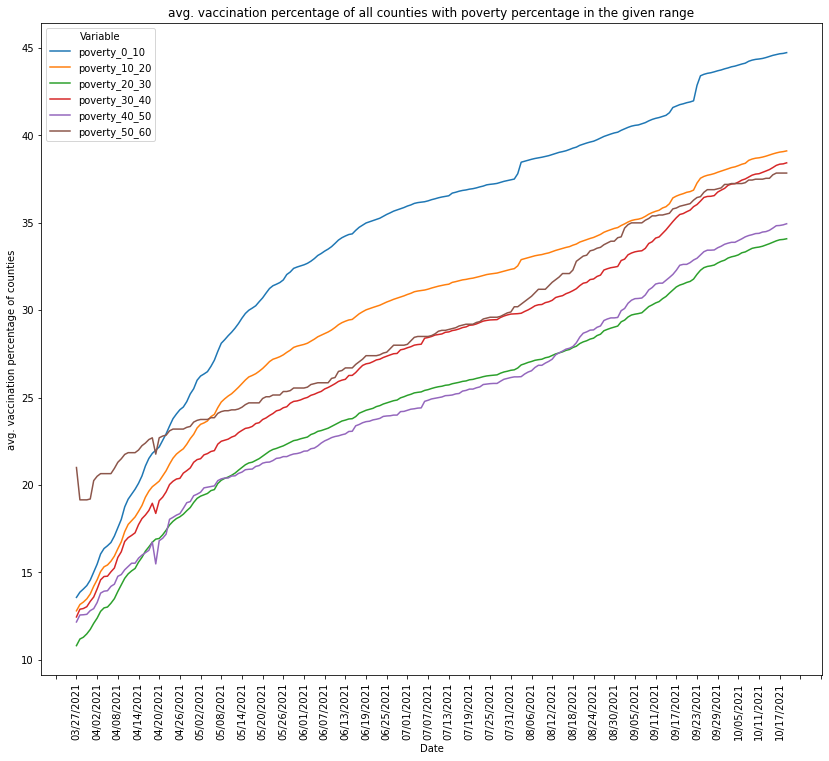

In [141]:
df_pov_grouped_1 = df_pov[0].groupby(['Date']).agg({'Series_Complete_Pop_Pct' : 'mean'}).reset_index()
df_pov_grouped_2 = df_pov[1].groupby(['Date']).agg({'Series_Complete_Pop_Pct' : 'mean'}).reset_index()
df_pov_grouped_3 = df_pov[2].groupby(['Date']).agg({'Series_Complete_Pop_Pct' : 'mean'}).reset_index()
df_pov_grouped_4 = df_pov[3].groupby(['Date']).agg({'Series_Complete_Pop_Pct' : 'mean'}).reset_index()
df_pov_grouped_5 = df_pov[4].groupby(['Date']).agg({'Series_Complete_Pop_Pct' : 'mean'}).reset_index()
df_pov_grouped_6 = df_pov[5].groupby(['Date']).agg({'Series_Complete_Pop_Pct' : 'mean'}).reset_index()


df_plot_df = pd.DataFrame({"date" : df_pov_grouped_1.Date,
                        "poverty_0_10" : df_pov_grouped_1.Series_Complete_Pop_Pct,
                        "poverty_10_20" : df_pov_grouped_2.Series_Complete_Pop_Pct,
                        "poverty_20_30" : df_pov_grouped_3.Series_Complete_Pop_Pct,
                        "poverty_30_40" : df_pov_grouped_4.Series_Complete_Pop_Pct,
                        "poverty_40_50" : df_pov_grouped_5.Series_Complete_Pop_Pct,
                        "poverty_50_60" : df_pov_grouped_6.Series_Complete_Pop_Pct,})
# df_plot_1
fig, ax1 = plt.subplots(figsize=(14, 12))
ax1.set_title('avg. vaccination percentage of all counties with poverty percentage in the given range')

tidy = df_plot_df.melt(id_vars='date').rename(columns=str.title)
ax = sns.lineplot(x='Date', y='Value', hue='Variable', data=tidy, ax=ax1)
ax.xaxis.set_major_locator(plt.MaxNLocator(40))
ax1.set(xlabel='Date', ylabel='avg. vaccination percentage of counties')
plt.xticks(rotation=90)
#plt.show()
plt.savefig('vacc_pct_poverty_range.png')

In [142]:
df_metro = merge_all_dates_vaccination_data[merge_all_dates_vaccination_data['Metro_status'] == 'Metro']
df_non_metro = merge_all_dates_vaccination_data[merge_all_dates_vaccination_data['Metro_status'] == 'Non-metro']

In [143]:
df_metro = df_metro.groupby(['Date']).agg({'Series_Complete_Pop_Pct' : 'mean'}).reset_index()
df_non_metro = df_non_metro.groupby(['Date']).agg({'Series_Complete_Pop_Pct' : 'mean'}).reset_index()

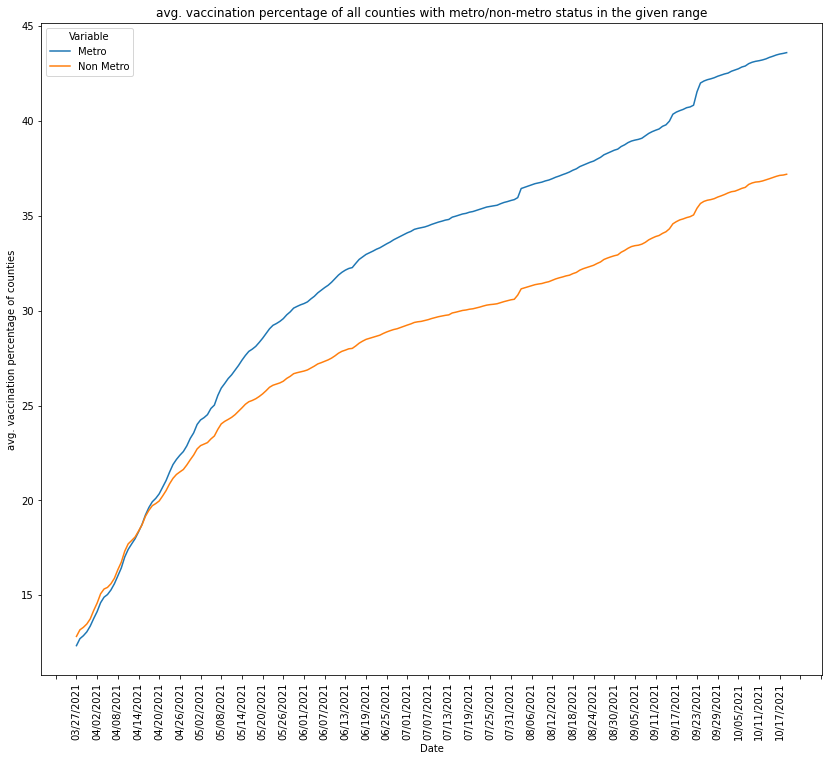

In [144]:
df_plot_df = pd.DataFrame({"date" : df_metro.Date,
                        "Metro" : df_metro.Series_Complete_Pop_Pct,
                        "Non Metro" : df_non_metro.Series_Complete_Pop_Pct,})
# df_plot_1
fig, ax1 = plt.subplots(figsize=(14, 12))
ax1.set_title('avg. vaccination percentage of all counties with metro/non-metro status in the given range')

tidy = df_plot_df.melt(id_vars='date').rename(columns=str.title)
ax = sns.lineplot(x='Date', y='Value', hue='Variable', data=tidy, ax=ax1)
ax.xaxis.set_major_locator(plt.MaxNLocator(40))
ax1.set(xlabel='Date', ylabel='avg. vaccination percentage of counties')
plt.xticks(rotation=90)
#plt.show()
plt.savefig('vacc_pct_metro_range.png')

In [145]:
# income_county = pd.read_csv("Income.csv")
# income_county = income_county.iloc[1:].reset_index()
# income_county.drop("index", axis=1, inplace=True)

hesitancy_county = pd.read_csv("Vaccine_Hesitancy_for_COVID-19__County_and_local_estimates.csv")

In [273]:
hesitancy_county.head()

,FIPS,County Name,State,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,Percent adults fully vaccinated against COVID-19 (as of 6/10/21),Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Geographical Point,State Code,County Boundary,State Boundary
0,1123,"Tallapoosa County, Alabama",ALABAMA,0.1806,0.2400,0.1383,0.89,Very High Vulnerability,0.64,High Concern,0.305,0.0242,0.0022,0.0036,0.2697,0.0000,0.6887,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-85.841259 33.104456, -85.8409...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
1,1121,"Talladega County, Alabama",ALABAMA,0.1783,0.2350,0.1368,0.87,Very High Vulnerability,0.84,Very High Concern,0.265,0.0229,0.0043,0.0061,0.3237,0.0003,0.6263,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-86.303069 33.46316, -86.30306...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
2,1131,"Wilcox County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.93,Very High Vulnerability,0.94,Very High Concern,0.394,0.0053,0.0009,0.0003,0.6938,0.0000,0.2684,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.52534299999999 32.132773, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
3,1129,"Washington County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.73,High Vulnerability,0.82,Very High Concern,0.308,0.0146,0.0731,0.0025,0.2354,0.0000,0.6495,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-88.45317899999999 31.505388, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
4,1133,"Winston County, Alabama",ALABAMA,0.1805,0.2313,0.1379,0.70,High Vulnerability,0.80,High Concern,0.163,0.0315,0.0034,0.0016,0.0073,0.0005,0.9370,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.63656399999999 34.120908, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."


In [147]:
hesitancy_county.rename(columns={'FIPS Code':'FIPS'}, inplace=True)

In [148]:
merge_all_dates_vaccination_data.head()

,FIPS,State_x,County_x,PopChangeRate1819,PopChangeRate1019,TotalPopEst2019,NetMigrationRate1019,NaturalChangeRate1019,Net_International_Migration_Rate_2010_2019,PopChangeRate0010,NetMigrationRate0010,NaturalChangeRate0010,Immigration_Rate_2000_2010,PopDensity2010,Under18Pct2010,Age65AndOlderPct2010,WhiteNonHispanicPct2010,BlackNonHispanicPct2010,AsianNonHispanicPct2010,NativeAmericanNonHispanicPct2010,HispanicPct2010,MultipleRacePct2010,NonHispanicWhitePopChangeRate0010,NonHispanicBlackPopChangeRate0010,NonHispanicAsianPopChangeRate0010,NonHispanicNativeAmericanPopChangeRate0010,HispanicPopChangeRate0010,MultipleRacePopChangeRate0010,WhiteNonHispanicNum2010,BlackNonHispanicNum2010,AsianNonHispanicNum2010,NativeAmericanNonHispanicNum2010,HispanicNum2010,MultipleRaceNum2010,ForeignBornPct,ForeignBornEuropePct,ForeignBornMexPct,NonEnglishHHPct,Ed1LessThanHSPct,Ed2HSDiplomaOnlyPct,Ed3SomeCollegePct,Ed4AssocDegreePct,Ed5CollegePlusPct,AvgHHSize,FemaleHHPct,HH65PlusAlonePct,OwnHomePct,ForeignBornNum,TotalPopACS,ForeignBornAfricaPct,Ed3SomeCollegeNum,Ed2HSDiplomaOnlyNum,Ed1LessThanHSNum,TotalPop25Plus,Ed5CollegePlusNum,TotalOccHU,ForeignBornAsiaPct,Ed4AssocDegreeNum,ForeignBornEuropeNum,NonEnglishHHNum,HH65PlusAloneNum,OwnHomeNum,FemaleHHNum,TotalHH,ForeignBornCentralSouthAmPct,ForeignBornCentralSouthAmNum,ForeignBornCaribPct,ForeignBornCaribNum,ForeignBornAfricaNum,ForeignBornAsiaNum,ForeignBornMexNum,LandAreaSQMiles2010,Age65AndOlderNum2010,TotalPop2010,Under18Num2010,Net_International_Migration_2000_2010,NaturalChangeNum0010,NetMigrationNum0010,TotalPopEst2012,TotalPopEst2013,TotalPopEst2010,TotalPopEst2014,TotalPopEst2011,Net_International_Migration_2010_2019,NaturalChange1019,TotalPopEst2015,TotalPopEst2016,TotalPopEst2017,NetMigration1019,TotalPopEst2018,TotalPopEstBase2010,County_state,FIPS_x,State_y,County_y,Median_HH_Inc_ACS,PerCapitaInc,Poverty_Rate_0_17_ACS,Poverty_Rate_ACS,Deep_Pov_All,Deep_Pov_Children,NumAll_inPOV_ACS,PCTPOV017,POV017,MedHHInc,POVALL,PCTPOVALL,Num_inPOV_0_17_ACS,Date,FIPS_y,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,1001,AL,Autauga,0.605,2.001,55869,0.686,1.315,-0.029,24.96,11.87,5.46,-0.010222,91.8,26.78,12.0,77.25,17.58,0.86,0.4,2.4,1.59,21.05,29.17,140.72,16.67,114.75,114.57,42154,9595,467,217,1310,869,2.345612,0.346696,0.474901,0.715054,11.483394,33.58846,19.950759,8.405813,26.571574,2.56,13.001823,10.370613,73.290648,1299.0,55380,0.236547,7455,12551,4291,37367,9929,21397,0.89563,3141,192.0,153,2219,15682,2782,21397,0.707837,392.0,0.130011,72.0,131.0,496.0,263.0,594.44,6546,54571,14613,-4.5,2403.5,5224.0,54954,54727,54773,54893,55227,-16.0,720.0,54864,55243,55390,376.0,55533,54597,AutaugaAL,1001.0,AL,Autauga,58731.0,29819.0,23.215238,15.185172,6.261607,9.592381,8340.0,15.9,2040.0,58233.0,6723.0,12.1,3047.0,03/27/2021,1001,12,Autauga,AL,8.1,4532.0,4532.0,9.5,4531.0,10.6,2406.0,27.0,93.5,8105,14.5,8105,17.0,8093.0,18.9,3934,44.1,B,5.0,5,5,5.0,Metro,1.0,1.0,1.0,1.0
1,1001,AL,Autauga,0.605,2.001,55869,0.686,1.315,-0.029,24.96,11.87,5.46,-0.010222,91.8,26.78,12.0,77.25,17.58,0.86,0.4,2.4,1.59,21.05,29.17,140.72,16.67,114.75,114.57,42154,9595,467,217,1310,869,2.345612,0.346696,0.474901,0.715054,11.483394,33.58846,19.950759,8.405813,26.

In [149]:
merge_all_dates_vaccination_data_with_hesitancy = pd.merge(hesitancy_county, merge_all_dates_vaccination_data, on="FIPS", how="outer")

In [274]:
merge_all_dates_vaccination_data_with_hesitancy.tail()

,FIPS,County Name,State,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,Percent adults fully vaccinated against COVID-19 (as of 6/10/21),Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Geographical Point,State Code,County Boundary,State Boundary,State_x,County_x,PopChangeRate1819,PopChangeRate1019,TotalPopEst2019,NetMigrationRate1019,NaturalChangeRate1019,Net_International_Migration_Rate_2010_2019,PopChangeRate0010,NetMigrationRate0010,NaturalChangeRate0010,Immigration_Rate_2000_2010,PopDensity2010,Under18Pct2010,Age65AndOlderPct2010,WhiteNonHispanicPct2010,BlackNonHispanicPct2010,AsianNonHispanicPct2010,NativeAmericanNonHispanicPct2010,HispanicPct2010,MultipleRacePct2010,NonHispanicWhitePopChangeRate0010,NonHispanicBlackPopChangeRate0010,NonHispanicAsianPopChangeRate0010,NonHispanicNativeAmericanPopChangeRate0010,HispanicPopChangeRate0010,MultipleRacePopChangeRate0010,WhiteNonHispanicNum2010,BlackNonHispanicNum2010,AsianNonHispanicNum2010,NativeAmericanNonHispanicNum2010,HispanicNum2010,MultipleRaceNum2010,ForeignBornPct,ForeignBornEuropePct,ForeignBornMexPct,NonEnglishHHPct,Ed1LessThanHSPct,Ed2HSDiplomaOnlyPct,Ed3SomeCollegePct,Ed4AssocDegreePct,Ed5CollegePlusPct,AvgHHSize,FemaleHHPct,HH65PlusAlonePct,OwnHomePct,ForeignBornNum,TotalPopACS,ForeignBornAfricaPct,Ed3SomeCollegeNum,Ed2HSDiplomaOnlyNum,Ed1LessThanHSNum,TotalPop25Plus,Ed5CollegePlusNum,TotalOccHU,ForeignBornAsiaPct,Ed4AssocDegreeNum,ForeignBornEuropeNum,NonEnglishHHNum,HH65PlusAloneNum,OwnHomeNum,FemaleHHNum,TotalHH,ForeignBornCentralSouthAmPct,ForeignBornCentralSouthAmNum,ForeignBornCaribPct,ForeignBornCaribNum,ForeignBornAfricaNum,ForeignBornAsiaNum,ForeignBornMexNum,LandAreaSQMiles2010,Age65AndOlderNum2010,TotalPop2010,Under18Num2010,Net_International_Migration_2000_2010,NaturalChangeNum0010,NetMigrationNum0010,TotalPopEst2012,TotalPopEst2013,TotalPopEst2010,TotalPopEst2014,TotalPopEst2011,Net_International_Migration_2010_2019,NaturalChange1019,TotalPopEst2015,TotalPopEst2016,TotalPopEst2017,NetMigration1019,TotalPopEst2018,TotalPopEstBase2010,County_state,FIPS_x,State_y,County_y,Median_HH_Inc_ACS,PerCapitaInc,Poverty_Rate_0_17_ACS,Poverty_Rate_ACS,Deep_Pov_All,Deep_Pov_Children,NumAll_inPOV_ACS,PCTPOV017,POV017,MedHHInc,POVALL,PCTPOVALL,Num_inPOV_0_17_ACS,Date,FIPS_y,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
692416,55099,"Price County, Wisconsin",WISCONSIN,0.1528,0.2039,0.0906,0.16,Very Low Vulnerability,0.2,Very Low Concern,0.542,0.0177,0.0096,0.006,0.0083,0.0085,0.9407,POINT (-89.732969 44.639954),WI,"MULTIPOLYGON (((-90.677753 45.725133, -90.6777...","MULTIPOLYGON (((-92.887067 45.644148, -92.8825...",WI,Price,-0.045,-5.292,13351.0,-1.263,-4.029,0.596,-10.51,-6.13,-4.15,0.00949,11.29,19.06,20.96,96.48,0.24,0.41,0.35,1.08,1.05,-11.65,112.5,23.4,-42.53,31.9,55.79,13661.0,34.0,58.0,50.0,153.0,148.0,1.848539,0.43232,0.007454,0.388756,8.221705,40.409629,21.636575,13.249854,16.482236,1.98,7.177033,13.875

In [151]:
merge_all_dates_vaccination_data_with_hesitancy["Estimated hesitant or unsure"].max()

0.3233

In [152]:
hesitancy_data_bins = []
num_bins = 4

def create_bins(data, bins, hesitancy_data_bins):
  for i in range(bins):
    temp_bin = []
    temp_bin = data[(data['Estimated hesitant or unsure'] >= (i * 10.0)/100) & (data['Estimated hesitant or unsure'] < (i * 10.0 + 10.0)/100)][["Date", "Series_Complete_Pop_Pct", "Estimated hesitant or unsure"]]
    hesitancy_data_bins.append(temp_bin)
  return hesitancy_data_bins


df_hesitant = create_bins(merge_all_dates_vaccination_data_with_hesitancy, num_bins, hesitancy_data_bins)
# df_pov[0]

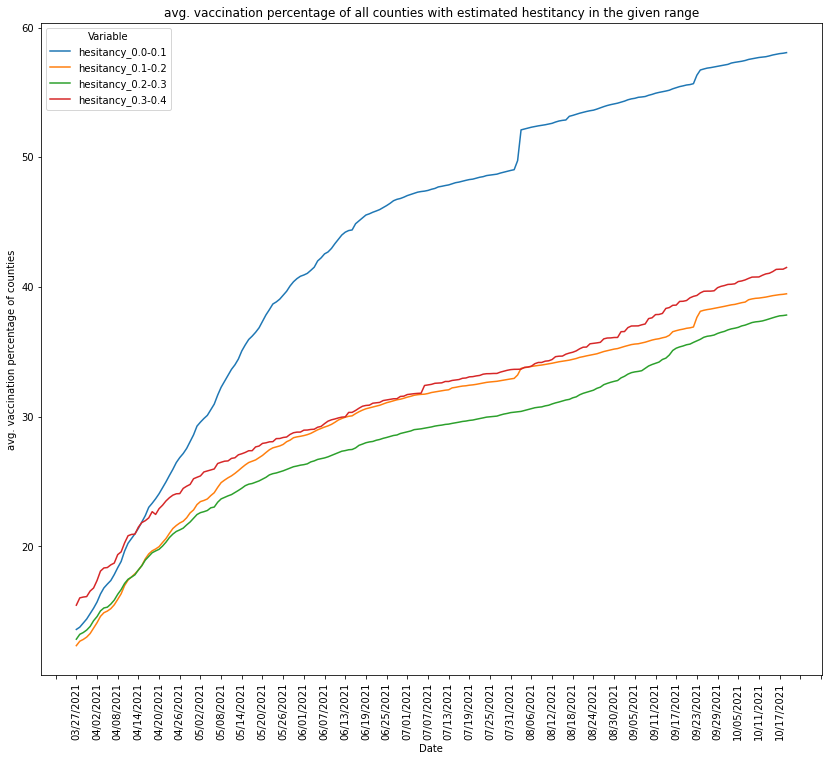

In [153]:
df_hesitant_grouped_1 = df_hesitant[0].groupby(['Date']).agg({'Series_Complete_Pop_Pct' : 'mean'}).reset_index()
df_hesitant_grouped_2 = df_hesitant[1].groupby(['Date']).agg({'Series_Complete_Pop_Pct' : 'mean'}).reset_index()
df_hesitant_grouped_3 = df_hesitant[2].groupby(['Date']).agg({'Series_Complete_Pop_Pct' : 'mean'}).reset_index()
df_hesitant_grouped_4 = df_hesitant[3].groupby(['Date']).agg({'Series_Complete_Pop_Pct' : 'mean'}).reset_index()


df_plot_df = pd.DataFrame({"date" : df_pov_grouped_1.Date,
                        "hesitancy_0.0-0.1" : df_hesitant_grouped_1.Series_Complete_Pop_Pct,
                        "hesitancy_0.1-0.2" : df_hesitant_grouped_2.Series_Complete_Pop_Pct,
                        "hesitancy_0.2-0.3" : df_hesitant_grouped_3.Series_Complete_Pop_Pct,
                        "hesitancy_0.3-0.4" : df_hesitant_grouped_4.Series_Complete_Pop_Pct,})
# df_plot_1
fig, ax1 = plt.subplots(figsize=(14, 12))
ax1.set_title('avg. vaccination percentage of all counties with estimated hestitancy in the given range')

tidy = df_plot_df.melt(id_vars='date').rename(columns=str.title)
ax = sns.lineplot(x='Date', y='Value', hue='Variable', data=tidy, ax=ax1)
ax.xaxis.set_major_locator(plt.MaxNLocator(40))
ax1.set(xlabel='Date', ylabel='avg. vaccination percentage of counties')
plt.xticks(rotation=90)
#plt.show()
plt.savefig('vacc_pct_hesitancy_range.png')

In [154]:
merge_all_dates_vaccination_data_with_hesitancy.head()

,FIPS,County Name,State,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,Percent adults fully vaccinated against COVID-19 (as of 6/10/21),Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Geographical Point,State Code,County Boundary,State Boundary,State_x,County_x,PopChangeRate1819,PopChangeRate1019,TotalPopEst2019,NetMigrationRate1019,NaturalChangeRate1019,Net_International_Migration_Rate_2010_2019,PopChangeRate0010,NetMigrationRate0010,NaturalChangeRate0010,Immigration_Rate_2000_2010,PopDensity2010,Under18Pct2010,Age65AndOlderPct2010,WhiteNonHispanicPct2010,BlackNonHispanicPct2010,AsianNonHispanicPct2010,NativeAmericanNonHispanicPct2010,HispanicPct2010,MultipleRacePct2010,NonHispanicWhitePopChangeRate0010,NonHispanicBlackPopChangeRate0010,NonHispanicAsianPopChangeRate0010,NonHispanicNativeAmericanPopChangeRate0010,HispanicPopChangeRate0010,MultipleRacePopChangeRate0010,WhiteNonHispanicNum2010,BlackNonHispanicNum2010,AsianNonHispanicNum2010,NativeAmericanNonHispanicNum2010,HispanicNum2010,MultipleRaceNum2010,ForeignBornPct,ForeignBornEuropePct,ForeignBornMexPct,NonEnglishHHPct,Ed1LessThanHSPct,Ed2HSDiplomaOnlyPct,Ed3SomeCollegePct,Ed4AssocDegreePct,Ed5CollegePlusPct,AvgHHSize,FemaleHHPct,HH65PlusAlonePct,OwnHomePct,ForeignBornNum,TotalPopACS,ForeignBornAfricaPct,Ed3SomeCollegeNum,Ed2HSDiplomaOnlyNum,Ed1LessThanHSNum,TotalPop25Plus,Ed5CollegePlusNum,TotalOccHU,ForeignBornAsiaPct,Ed4AssocDegreeNum,ForeignBornEuropeNum,NonEnglishHHNum,HH65PlusAloneNum,OwnHomeNum,FemaleHHNum,TotalHH,ForeignBornCentralSouthAmPct,ForeignBornCentralSouthAmNum,ForeignBornCaribPct,ForeignBornCaribNum,ForeignBornAfricaNum,ForeignBornAsiaNum,ForeignBornMexNum,LandAreaSQMiles2010,Age65AndOlderNum2010,TotalPop2010,Under18Num2010,Net_International_Migration_2000_2010,NaturalChangeNum0010,NetMigrationNum0010,TotalPopEst2012,TotalPopEst2013,TotalPopEst2010,TotalPopEst2014,TotalPopEst2011,Net_International_Migration_2010_2019,NaturalChange1019,TotalPopEst2015,TotalPopEst2016,TotalPopEst2017,NetMigration1019,TotalPopEst2018,TotalPopEstBase2010,County_state,FIPS_x,State_y,County_y,Median_HH_Inc_ACS,PerCapitaInc,Poverty_Rate_0_17_ACS,Poverty_Rate_ACS,Deep_Pov_All,Deep_Pov_Children,NumAll_inPOV_ACS,PCTPOV017,POV017,MedHHInc,POVALL,PCTPOVALL,Num_inPOV_0_17_ACS,Date,FIPS_y,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,1123,"Tallapoosa County, Alabama",ALABAMA,0.1806,0.24,0.1383,0.89,Very High Vulnerability,0.64,High Concern,0.305,0.0242,0.0022,0.0036,0.2697,0.0,0.6887,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-85.841259 33.104456, -85.8409...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352...",AL,Tallapoosa,-0.414,-2.674,40367.0,-0.868,-1.806,0.036,0.34,-0.09,-1.2,0.233875,58.08,22.15,17.28,69.3,26.55,0.47,0.29,2.5,0.98,-4.96,5.36,166.22,11.21,330.58,80.09,28838.0,11050.0,197.0,119.0,1042.0,407.0,1.465183,0.078932,0.813991,0.450478,19.346287,32.706596,20.678829,8.825479,18.442809,2.46,13.816723,13.724

In [275]:
one_county_data = merge_all_dates_vaccination_data_with_hesitancy[merge_all_dates_vaccination_data_with_hesitancy["County_state"] == "PriceWI"]

In [276]:
one_county_data.tail()

,FIPS,County Name,State,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,Percent adults fully vaccinated against COVID-19 (as of 6/10/21),Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Geographical Point,State Code,County Boundary,State Boundary,State_x,County_x,PopChangeRate1819,PopChangeRate1019,TotalPopEst2019,NetMigrationRate1019,NaturalChangeRate1019,Net_International_Migration_Rate_2010_2019,PopChangeRate0010,NetMigrationRate0010,NaturalChangeRate0010,Immigration_Rate_2000_2010,PopDensity2010,Under18Pct2010,Age65AndOlderPct2010,WhiteNonHispanicPct2010,BlackNonHispanicPct2010,AsianNonHispanicPct2010,NativeAmericanNonHispanicPct2010,HispanicPct2010,MultipleRacePct2010,NonHispanicWhitePopChangeRate0010,NonHispanicBlackPopChangeRate0010,NonHispanicAsianPopChangeRate0010,NonHispanicNativeAmericanPopChangeRate0010,HispanicPopChangeRate0010,MultipleRacePopChangeRate0010,WhiteNonHispanicNum2010,BlackNonHispanicNum2010,AsianNonHispanicNum2010,NativeAmericanNonHispanicNum2010,HispanicNum2010,MultipleRaceNum2010,ForeignBornPct,ForeignBornEuropePct,ForeignBornMexPct,NonEnglishHHPct,Ed1LessThanHSPct,Ed2HSDiplomaOnlyPct,Ed3SomeCollegePct,Ed4AssocDegreePct,Ed5CollegePlusPct,AvgHHSize,FemaleHHPct,HH65PlusAlonePct,OwnHomePct,ForeignBornNum,TotalPopACS,ForeignBornAfricaPct,Ed3SomeCollegeNum,Ed2HSDiplomaOnlyNum,Ed1LessThanHSNum,TotalPop25Plus,Ed5CollegePlusNum,TotalOccHU,ForeignBornAsiaPct,Ed4AssocDegreeNum,ForeignBornEuropeNum,NonEnglishHHNum,HH65PlusAloneNum,OwnHomeNum,FemaleHHNum,TotalHH,ForeignBornCentralSouthAmPct,ForeignBornCentralSouthAmNum,ForeignBornCaribPct,ForeignBornCaribNum,ForeignBornAfricaNum,ForeignBornAsiaNum,ForeignBornMexNum,LandAreaSQMiles2010,Age65AndOlderNum2010,TotalPop2010,Under18Num2010,Net_International_Migration_2000_2010,NaturalChangeNum0010,NetMigrationNum0010,TotalPopEst2012,TotalPopEst2013,TotalPopEst2010,TotalPopEst2014,TotalPopEst2011,Net_International_Migration_2010_2019,NaturalChange1019,TotalPopEst2015,TotalPopEst2016,TotalPopEst2017,NetMigration1019,TotalPopEst2018,TotalPopEstBase2010,County_state,FIPS_x,State_y,County_y,Median_HH_Inc_ACS,PerCapitaInc,Poverty_Rate_0_17_ACS,Poverty_Rate_ACS,Deep_Pov_All,Deep_Pov_Children,NumAll_inPOV_ACS,PCTPOV017,POV017,MedHHInc,POVALL,PCTPOVALL,Num_inPOV_0_17_ACS,Date,FIPS_y,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
692416,55099,"Price County, Wisconsin",WISCONSIN,0.1528,0.2039,0.0906,0.16,Very Low Vulnerability,0.2,Very Low Concern,0.542,0.0177,0.0096,0.006,0.0083,0.0085,0.9407,POINT (-89.732969 44.639954),WI,"MULTIPOLYGON (((-90.677753 45.725133, -90.6777...","MULTIPOLYGON (((-92.887067 45.644148, -92.8825...",WI,Price,-0.045,-5.292,13351.0,-1.263,-4.029,0.596,-10.51,-6.13,-4.15,0.00949,11.29,19.06,20.96,96.48,0.24,0.41,0.35,1.08,1.05,-11.65,112.5,23.4,-42.53,31.9,55.79,13661.0,34.0,58.0,50.0,153.0,148.0,1.848539,0.43232,0.007454,0.388756,8.221705,40.409629,21.636575,13.249854,16.482236,1.98,7.177033,13.875

In [277]:
import tensorflow as tf
from tensorflow import keras

In [278]:
x = ["Series_Complete_Pop_Pct"]
y = ["Series_Complete_Pop_Pct"]

In [279]:
x = one_county_data[x]
y = one_county_data[y]

In [280]:
len(x)

231

In [281]:
len(y)

231

In [282]:
train_x = []
train_y = []
for i in range(20,len(x)):
  train_x.append(x.iloc[i-20:i])
  train_y.append(y.iloc[i]-y.iloc[i-1])

In [283]:
len(train_x), len(train_y)

(211, 211)

In [284]:
y.shape

(231, 1)

In [285]:
train_x = np.array(train_x)
train_y = np.array(train_y)

In [286]:
train_x.shape, train_y.shape

((211, 20, 1), (211, 1))

In [287]:
model = keras.models.Sequential()

#Adding the first keras.layers.LSTM layer and some keras.layers.Dropout regularisation
model.add(keras.layers.LSTM(units = 50, return_sequences = True, input_shape = (train_x.shape[1], train_x.shape[2])))
model.add(keras.layers.Dropout(0.2))
# Adding a second keras.layers.LSTM layer and some keras.layers.Dropout regularisation
model.add(keras.layers.LSTM(units = 50, return_sequences = True))
model.add(keras.layers.Dropout(0.2))
# Adding a third keras.layers.LSTM layer and some keras.layers.Dropout regularisation
model.add(keras.layers.LSTM(units = 50, return_sequences = True))
model.add(keras.layers.Dropout(0.2))
# Adding a fourth keras.layers.LSTM layer and some keras.layers.Dropout regularisation
model.add(keras.layers.LSTM(units = 50))
model.add(keras.layers.Dropout(0.2))
# Adding the output layer
model.add(keras.layers.Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics='mae')

# Fitting the RNN to the Training set
model.fit(train_x, train_y, epochs = 100, batch_size = 8)

Epoch 1/100
27/27 [==============================] - 7s 33ms/step - loss: 0.1122 - mae: 0.1889
Epoch 2/100
27/27 [==============================] - 1s 32ms/step - loss: 0.0993 - mae: 0.1769
Epoch 3/100
27/27 [==============================] - 1s 32ms/step - loss: 0.1061 - mae: 0.1767
Epoch 4/100
27/27 [==============================] - 1s 32ms/step - loss: 0.1011 - mae: 0.1748
Epoch 5/100
27/27 [==============================] - 1s 34ms/step - loss: 0.0962 - mae: 0.1693
Epoch 6/100
27/27 [==============================] - 1s 33ms/step - loss: 0.0938 - mae: 0.1697
Epoch 7/100
27/27 [==============================] - 1s 33ms/step - loss: 0.0933 - mae: 0.1647
Epoch 8/100
27/27 [==============================] - 1s 33ms/step - loss: 0.0993 - mae: 0.1806
Epoch 9/100
27/27 [==============================] - 1s 33ms/step - loss: 0.1039 - mae: 0.1720
Epoch 10/100
27/27 [==============================] - 1s 32ms/step - loss: 0.0981 - mae: 0.1623
Epoch 11/100
27/27 [=============================

In [288]:
y_pred = model.predict(train_x)

In [289]:
train_x[-1], model.predict(np.array([train_x[-1]]))

(array([[54.5],
        [54.6],
        [54.8],
        [54.9],
        [55. ],
        [55. ],
        [55. ],
        [55. ],
        [55.1],
        [55.2],
        [55.3],
        [55.4],
        [55.4],
        [55.4],
        [55.5],
        [55.6],
        [55.7],
        [55.8],
        [56. ],
        [56. ]]), array([[0.08224607]], dtype=float32))

In [290]:
curr = train_x[-1]
y_predicted_val = model.predict(np.array([train_x[-1]]))
forcasted_values = []

last_value = y_predicted_val[0]
time=0
while(True):
  curr = np.append(curr[1:len(curr)+1] , curr[-1] + y_predicted_val[0])
  y_predicted_val = model.predict(np.array([curr]))
  print(curr[-1])
  forcasted_values.append(curr[-1])
  if curr[-1]>80:
    break
  if last_value == y_predicted_val[0]:
    break
  else:
    last_value = y_predicted_val[0]
  time+=1

56.08224607259035
56.16438674926758
56.24642562866211
56.328372955322266
56.41022872924805
56.49199676513672
56.57366943359375
56.655242919921875
56.73670959472656
56.81807327270508
56.89933776855469
56.98050308227539
57.06156921386719
57.14253234863281
57.223388671875
57.304141998291016
57.38479232788086
57.4653434753418
57.545799255371094
57.626163482666016
57.70643615722656
57.786617279052734
57.86670684814453
57.94670486450195
58.026615142822266
58.1064338684082
58.18616485595703
58.26580810546875
58.345367431640625
58.424842834472656
58.50423049926758
58.583534240722656
58.662757873535156
58.74189758300781
58.82095718383789
58.89993667602539
58.97883605957031
59.057655334472656
59.13639831542969
59.21506118774414
59.29364776611328
59.37215805053711
59.450592041015625
59.528953552246094
59.607242584228516
59.685455322265625
59.76359558105469
59.8416633605957
59.91966247558594
59.997589111328125
60.07544708251953
60.153236389160156
60.23095703125
60.30860900878906
60.386192321777344

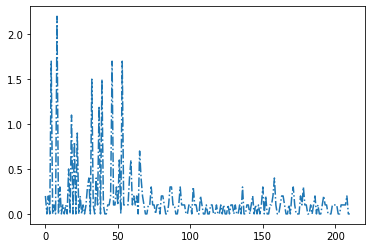

In [292]:
plt.plot(range(len(y_pred)), train_y, "-.")

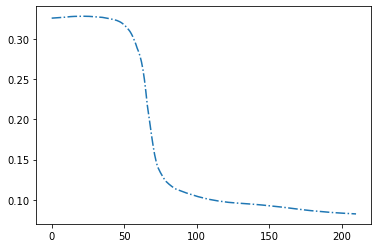

In [293]:
plt.plot(range(len(y_pred)), y_pred, "-.")

In [294]:
time

325